# Python animation

## Setup

### Define shape

In [1]:
from pathlib import Path

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Define original shape (triangle)
original_shape = np.array([
    [0, 0],
    [1, 0],
    [0.5, 1],
    [0, 0]  # Close the triangle
]).T  # Shape is 2xN

## Define helper for transformations

In [2]:
def get_transformation_matrix(
    scale: float,
    angle: float,
    tx: float,
    ty: float,
):
    '''Creates the transformation matrix for scaling, rotation, and translation.'''

    S = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]
    ])
    R = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return T @ R @ S

## Define animation parameters

In [3]:
num_frames = 60
angles = np.linspace(0, 2 * np.pi, num_frames)
scales = np.linspace(1, 2, num_frames)
translations = np.linspace(0, 5, num_frames)

## Animation

## Setup export

In [4]:
# Set up output directory using pathlib
output_dir = Path("out")
output_dir.mkdir(exist_ok=True)

# Store image filenames
filenames: list[Path] = []

## Animation loop


Animated GIF with matrices saved as: out/animation.gif


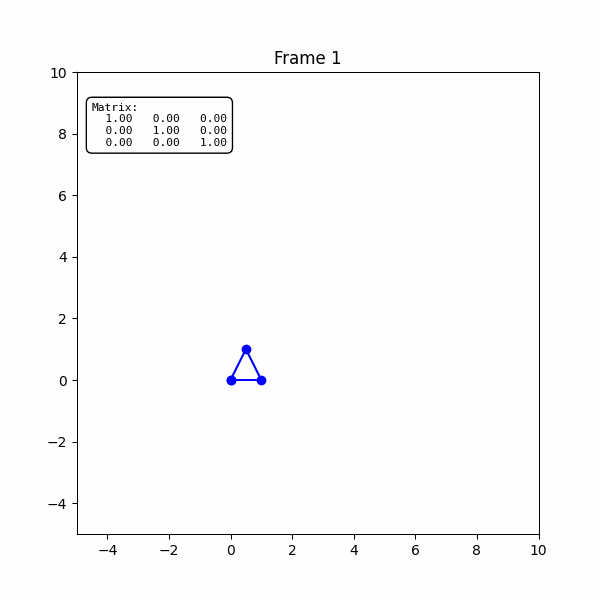

In [5]:
for frame in range(num_frames):
    angle = angles[frame]
    scale = scales[frame]
    tx = translations[frame]
    ty = translations[frame]

    # Compute transformation matrix
    matrix = get_transformation_matrix(scale, angle, tx, ty)

    # Convert shape to homogeneous coordinates
    ones = np.ones((1, original_shape.shape[1]))
    shape_homogeneous = np.vstack((original_shape, ones))

    # Apply transformation
    transformed_shape = matrix @ shape_homogeneous

    # Plot shape
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(transformed_shape[0], transformed_shape[1], 'bo-')
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 10)
    ax.set_aspect('equal')
    ax.set_title(f"Frame {frame+1}")

    # Display matrix as text
    matrix_text = '\n'.join(
        [' '.join([f"{num:6.2f}" for num in row]) for row in matrix])
    ax.text(-4.5, 9, f"Matrix:\n{matrix_text}", fontsize=8, family='monospace', verticalalignment='top',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Save frame
    filename = output_dir / f"frame_{frame:03d}.png"
    fig.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

# Create animated GIF
gif_path = output_dir / "animation.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.05, loop=0) as writer:
    for idx, filename in enumerate(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"Animated GIF with matrices saved as: {gif_path}")
Image(filename=gif_path)